# Spatial Operations

Let's examine the different representations of a region (polygon vs point-based). 

In [2]:
# Load relevant R packages
inLibraries = list('repr','rgdal','rgeos','sp')

for (rpack in inLibraries) {
  if (is.element(rpack,installed.packages()[,1])){            
      #Load the library into R
      suppressMessages(library(rpack,character.only = TRUE))
    }
    else {
        print(paste("Warning:  ",rpack," is not an installed package"))
    }
}
#resize plot area
options(repr.plot.width=6, repr.plot.height=6)

## Read Census Tract Polygons

Here we will examine several geospatial queries and diffences that result using Census tracts in Louisiana  (la_censustracts/LA_censustracts.shp).

In [3]:
inFeatures <- readOGR("datasets/la_censustracts", "LA_censustracts")

OGR data source with driver: ESRI Shapefile 
Source: "datasets/la_censustracts", layer: "LA_censustracts"
with 1140 features
It has 50 fields
Integer64 fields read as strings:  ObjectID POP2000 POP2010 WHITE BLACK AMERI_ES ASIAN HAWN_PI HISPANIC OTHER MULT_RACE MALES FEMALES AGE_UNDER5 AGE_5_9 AGE_10_14 AGE_15_19 AGE_20_24 AGE_25_34 AGE_35_44 AGE_45_54 AGE_55_64 AGE_65_74 AGE_75_84 AGE_85_UP HOUSEHOLDS HSEHLD_1_M HSEHLD_1_F MARHH_CHD MARHH_NO_C MHH_CHILD FHH_CHILD FAMILIES HSE_UNITS VACANT OWNER_OCC RENTER_OCC 


In [4]:
t(head(inFeatures@data))

,0,1,2,3,4,5
ObjectID,28206,28207,28208,28209,28210,28211
STATE_FIPS,22,22,22,22,22,22
CNTY_FIPS,001,001,001,001,001,001
STCOFIPS,22001,22001,22001,22001,22001,22001
TRACT,960100,960200,960300,960400,960500,960600
FIPS,22001960100,22001960200,22001960300,22001960400,22001960500,22001960600
POP2000,6188,5056,3149,5617,4927,5654
POP00_SQMI,339.4,37.3,34.7,43.8,66.3,426.7
POP2010,6213,5988,3582,6584,6093,5972
POP10_SQMI,345.2,44.4,39.8,51.8,82.3,459.4


### Polygon to Point Representation

These Census tracts are currently rendered as polygon features. However, they can also be rendered as point features by picking a representive point for each polygon (i.e. a "centroid").  

In [5]:
#Convert polygon features to point features
PolyCentroids <- gCentroid(inFeatures, byid=TRUE)

In [6]:
head(PolyCentroids)

SpatialPoints:
         x       y
0 575187.9 3364491
1 558021.4 3365023
2 540690.5 3358881
3 553645.3 3350391
4 573616.9 3354305
5 573998.9 3345870
Coordinate Reference System (CRS) arguments: +proj=utm +zone=15
+datum=NAD83 +units=m +no_defs +ellps=GRS80 +towgs84=0,0,0 

### Visualize Tracts and Tract Centroids

Display the polygons and their respective centroids. http://www.statmethods.net/advgraphs/parameters.html

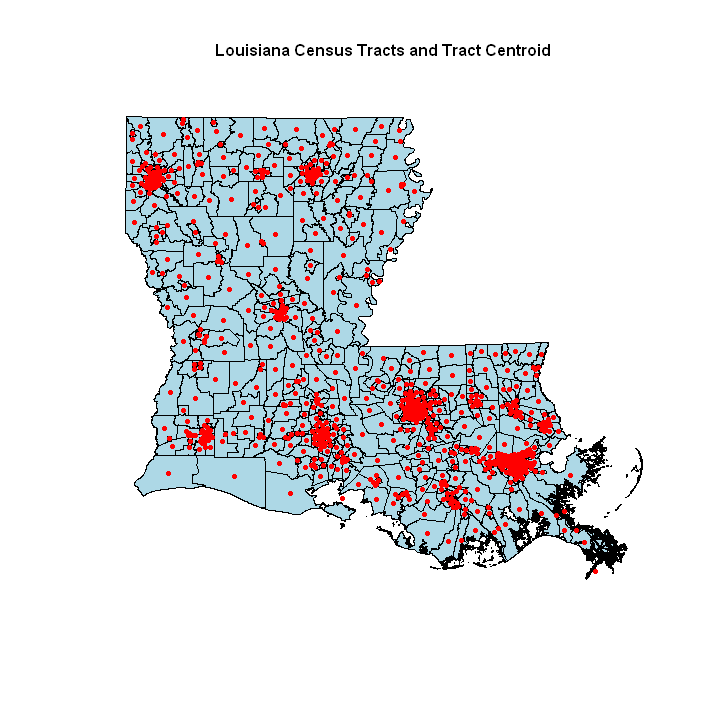

In [7]:
#plot tracts and tract centroids
plot(inFeatures, 
         col="lightblue", 
         lwd=.2, 
         main='Louisiana Census Tracts and Tract Centroid', 
         cex.main=.8)

plot(PolyCentroids, 
         add=TRUE, 
         col="red",
         pch=21,
         bg="red",
         lwd=.2,
         cex=0.5)

### The Centroid of What?

Notice that in many instances, the centroid selected is centrally located within a polygon.  However, in other cases it is not - i.e. see the centroids falling in the ocean. Why does this happen?  It's due to how the centroid is found and how the data is structured. For example, if the centroid is defined as the mean center of a polygon and the polygon is highly non-convex, then the mean center could fall outside of the polygon. If a census block was comprised of more than one polygon (i.e. due to a fragmented area), then the mean center could also fall outside of the component polygons.

## Modeling Proximity Conditions - Buffering

In order to evaluate spatial relationships, let's select a single feature FIPS = '22099021000' from the featureclass.  Here, the FIPS code of one Census Tract is used as a selection criteria. Plot the selected Tract.

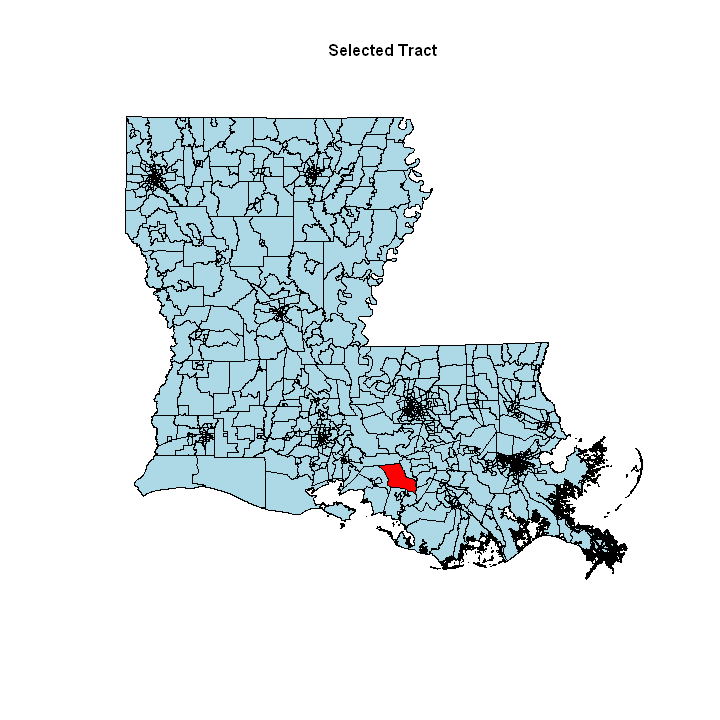

In [8]:
#Select a feature to examine
FeatA <- inFeatures[inFeatures@data$FIPS == '22099021000', ]

plot(inFeatures,
         col="lightblue",
         lwd=.2,
         main='Selected Tract',
         cex.main=.8)


plot(FeatA, 
         add=TRUE, 
         col="red",
         lwd=.2)

### Buffer to Assess Proximity

For the selected polygon (displayed in red), consider a distance threshold from the polygon to other polygons within the region.  One way of doing this is to compute the geometric dilation (or buffer) of the polygon, representing its size if it expanded by some distance in all directions.  The gBuffer() function (rgeos library) can be used to accomplish this task. Investigate the various parameters that can be used to populate the gBuffer() function.  The distance to which the polygon is buffered in this case is controlled by the 'width' parameter. Given that the datasets coordinate system is in meters, 'width' should represent the distance to buffer in meters.  The buffered polygon should show up on the display outlined in a thicker black line.

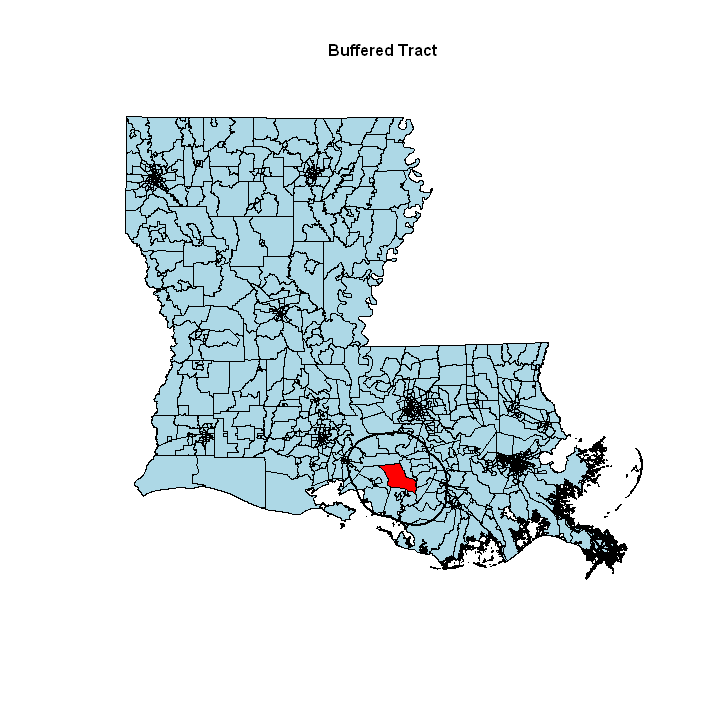

In [9]:
#Compute the geometric dialation of the selected feature
FeatA.buf <- gBuffer(FeatA, 
                         byid=TRUE, 
                         id=NULL, 
                         width=30000, 
                         quadsegs=5, 
                         capStyle="ROUND", 
                         joinStyle="ROUND", 
                         mitreLimit=1.0)

#Display selection
plot(inFeatures,
         col="lightblue",
         lwd=.2,
         main="Buffered Tract",
         cex.main=.8)

plot(FeatA, 
         add=TRUE, 
         col="red",
         lwd=.2)

plot(FeatA.buf,
         add=TRUE,
         lwd=2)

## Assessing Geometric Intersection of Features

First, let's consider the geometric intersection of the buffer area with other tracts in the region. Tracts are considered to intersect the polygon should they share any space with it. Here, the over() function (rgeos library) can be used to evaluate the geometric intersection of a set of features. Note that the output of the over() function is a list of intersecting features.

In [10]:
selFeat <- overGeomGeom(FeatA.buf, inFeatures, returnList = TRUE, fn = NULL)

typeof(selFeat)

[1] "list"

In [11]:
# unlist the list
intSet = unlist(selFeat)

In [12]:
# determine number of intersecting features
print(paste("There are ", length(intSet)," intersecting features"))

[1] "There are  56  intersecting features"


Now select the intersecting features from the featureclass and display the results. 

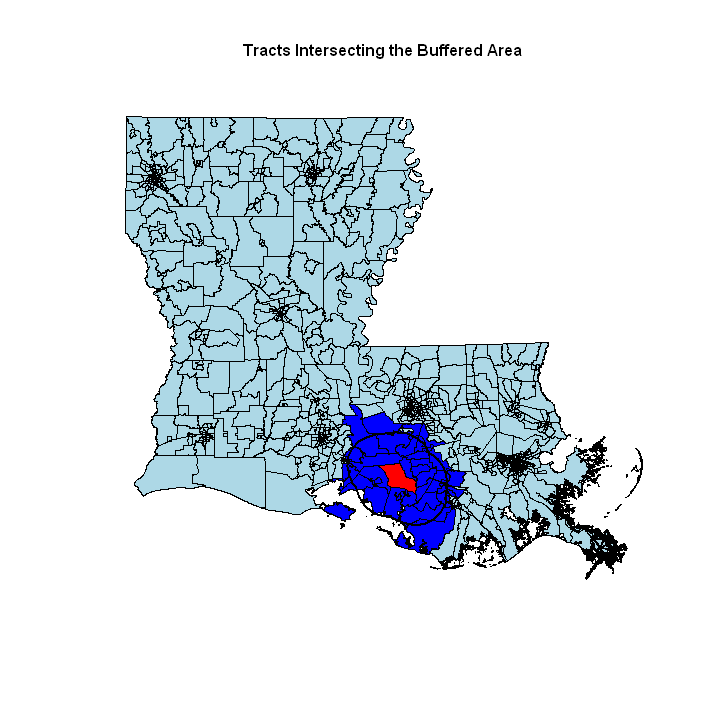

In [13]:
# Select the intersecting features from the featureclass
intFeat <- inFeatures[intSet,]

# Display selected features
plot(inFeatures,
         col = "lightblue",
         lwd = 0.2,
         main = 'Tracts Intersecting the Buffered Area',
         cex.main=.8)

plot(intFeat,
         col = "blue",
         lwd = 0.2,
         add=TRUE)

plot(FeatA, 
         add = TRUE, 
         col = "red",
         lwd = 0.2)

plot(FeatA.buf,
         add = TRUE, 
         lwd = 2)

## Assessing Containment of Features

Another type of spatial query is to select features that are completely contained within another polygon.  Here, we can assess which Tracts fall within the buffer area.  Before you try this, think about it...should more or less tracts be selected?... which criteria is more restrictive 'intersect' or 'is contained within'?  Ok, no more waiting, you can find out now.  The features that are completely contained within the buffer polygon will be a subset of the intersecting features.  Thus, given that we have already identified the intersecting features, we can iterate through that set and test each individual feature for containment. To accomplish this, the gContains() function (rgeos library) can be used.

In [14]:
#Iterate through intersecting features, find which ones are COMPLETELY CONTAINED WITHIN the selected feature
i <- 1
containedList <- list()

for (subsel in selFeat){
    for (ele in subsel){
        
    if (gContains(FeatA.buf, inFeatures[ele,], byid = FALSE, prepared=TRUE, 
                      returnDense=TRUE, STRsubset=FALSE, checkValidity=FALSE)){
        containedList[[i]]<-ele
        i <- i+1
       }
    }
}

contSet = unlist(containedList)
print(paste("There are ",length(contSet)," completely contained features"))

[1] "There are  28  completely contained features"


In [15]:
contSet

[1]   32   33   34   35   36   37  536  538  539  540  541  558  970  971  972
[16]  973  974  975  976  977  980  982  983  984  985  986 1053 1072

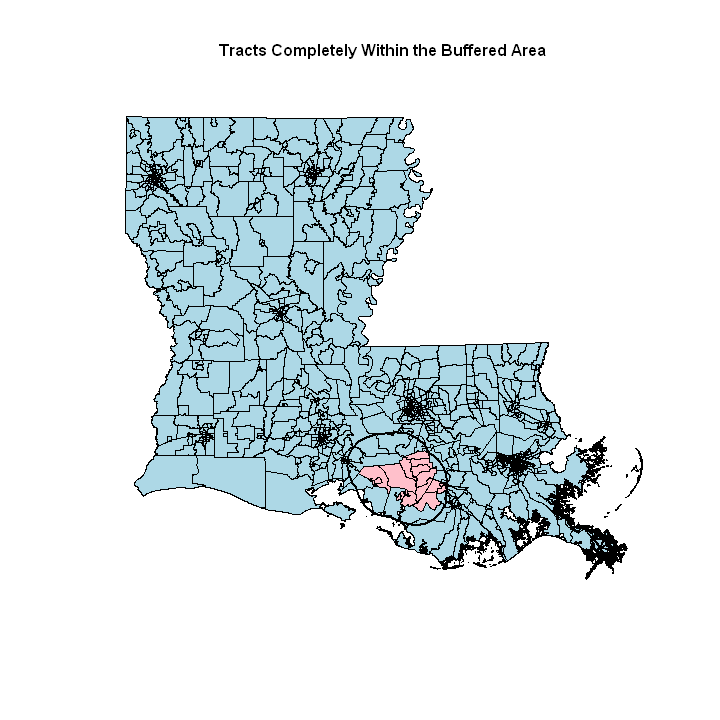

In [19]:
#select the features completely contained within the buffer area.
contFeat <- inFeatures[contSet,]

#Display selected features
plot(inFeatures,
         col="lightblue",
         lwd=.2,
         main='Tracts Completely Within the Buffered Area',
         cex.main=.8)

plot(contFeat,
         col="pink",
         lwd=.2,
         add=TRUE)

plot(FeatA.buf,
         add=TRUE,lwd=2)

## Alternative Representations = Alternative Results

What happens when the spatial representation of this system is changed?  For example, instead of representing this region as a set of polygons, it could be rendered as a set of points (one for each polygon) as was done earlier in this practice.  This type of generalization is commonly encountered - i.e. representing cities as points vs polygons. Now view the centroids of the tracts created earlier.

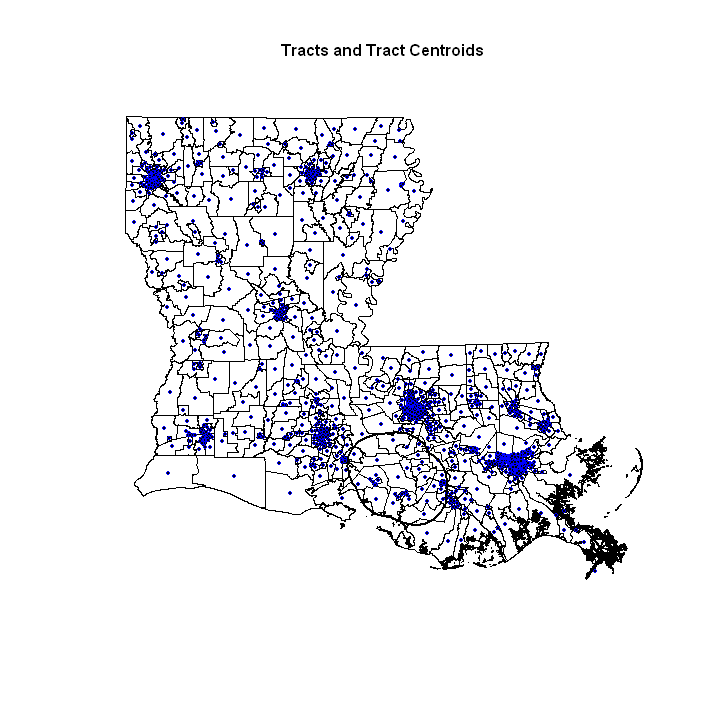

In [20]:
plot(inFeatures,
         col="white",
         lwd=.2,
         main='Tracts and Tract Centroids',
         cex.main=.8)

plot(PolyCentroids, 
         add=TRUE, 
         col="blue",
         pch=21,
         lwd=.2,
         cex=.4)

plot(FeatA.buf,
         add=TRUE,
         lwd=2)

### Intersecting Centroids

As was done for the polygon tracts, select tract centroids (and associated polygons) which intersect the buffer area. Does the number of intersecting point features differ from the number of intersecting polygon features identified earlier?

In [21]:
selPts <- overGeomGeom(FeatA.buf, PolyCentroids, returnList = TRUE, fn = NULL)

# unlist the list
intPtSet = unlist(selPts)

# determine number of intersecting features
print(paste("There are ",length(intPtSet)," intersecting features"))

[1] "There are  42  intersecting features"


In [22]:
# Select the intersecting features from the featureclass
intPtFeat <- PolyCentroids[intPtSet,]
intPolyFeat <- inFeatures[intPtSet,]

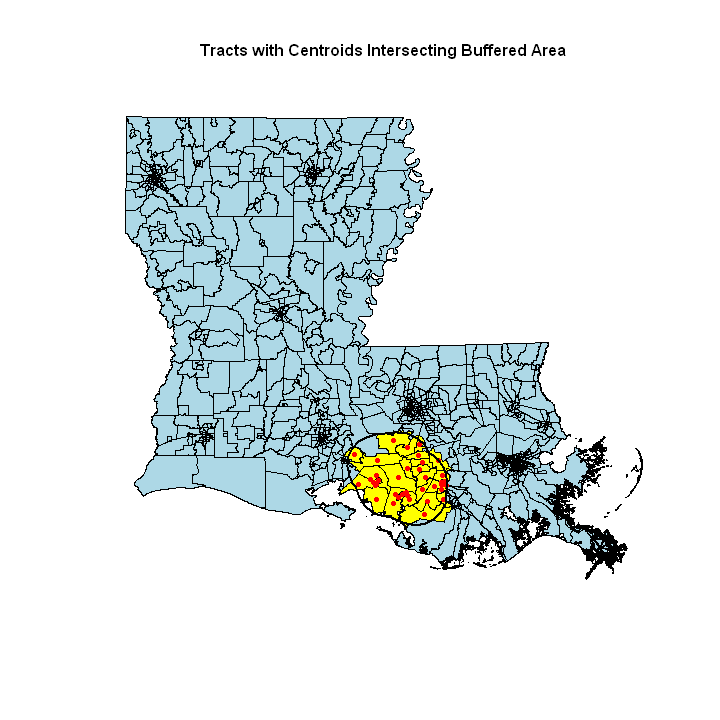

In [23]:
#Display selected features

plot(inFeatures,
         col = "lightblue",
         lwd = 0.2,
         main = 'Tracts with Centroids Intersecting Buffered Area',
         cex.main = 0.8)

plot(intPolyFeat, 
         add = TRUE, 
         col = "yellow",
         lwd = 0.2)

plot(intPtFeat, 
         add = TRUE, 
         col = "red",
         pch = 21,
         bg = "red",
         lwd = 0.2,
         cex = 0.5)

plot(FeatA.buf,
             add = TRUE,
             lwd = 2)